# КТ №1 Шилин Кирилл Э-1813

In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
dfAthlete = pd.read_csv('D:/Учеба/МППП/данные/athlete_events.csv')
dfAthlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [198]:
dfAthlete.Sport.value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

In [199]:
dfAthlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [200]:
un = dfAthlete.copy()
un = un.drop_duplicates(subset='ID').reset_index()
un = un.drop(['index'],axis=1)
un = un[['ID','Name','Sex','Height','Weight','Team','NOC','Season','Sport']]
un

,ID,Name,Sex,Height,Weight,Team,NOC,Season,Sport
0,1,A Dijiang,M,180.0,80.0,China,CHN,Summer,Basketball
1,2,A Lamusi,M,170.0,60.0,China,CHN,Summer,Judo
2,3,Gunnar Nielsen Aaby,M,NaN,NaN,Denmark,DEN,Summer,Football
3,4,Edgar Lindenau Aabye,M,NaN,NaN,Denmark/Sweden,DEN,Summer,Tug-Of-War
4,5,Christine Jacoba Aaftink,F,185.0,82.0,Netherlands,NED,Winter,Speed Skating
...,...,...,...,...,...,...,...,...,...
135566,135567,Aleksandr Viktorovich Zyuzin,M,183.0,72.0,Russia,RUS,Summer,Rowing
135567,135568,Olga Igorevna Zyuzkova,F,171.0,69.0,Belarus,BLR,Summer,Basketball
135568,135569,Andrzej ya,M,179.0,89.0,Poland-1,POL,Winter,Luge
135569,135570,Piotr ya,M,176.0,59.0,Poland,POL,Winter,Ski Jumping


In [201]:
print('Всего во всех олимпиадах (данные по которым имеются) приняло участие',len(un), 'спортсмена.')

Всего во всех олимпиадах (данные по которым имеются) приняло участие 135571 спортсмена.


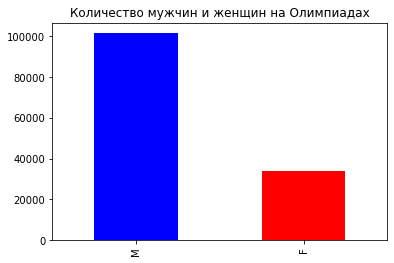

In [202]:
un['Sex'].value_counts().plot.bar(color=['b','r'], title='Количество мужчин и женщин на Олимпиадах');

На столбчатой диаграмме выше видно, что почти втрое больше мужчин за все время принимало участие в олимпиадах, чем женщин. Скорее всего это вызвано чуть больше популиризацией мужского спорта и большего количество исключительно мужсикх видов спорта.

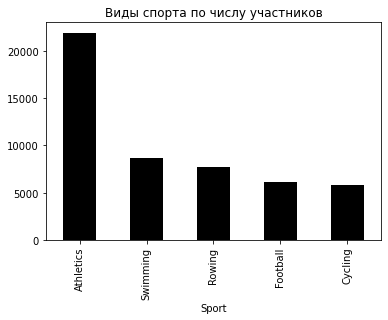

In [203]:
sports = un.groupby('Sport').size().sort_values(ascending=False).head(5)
sports.plot.bar(title='Виды спорта по числу участников', color ='k');

Из диаграммы становится очевидно, что наибольшее число спортсменов приняло участие в соревнованиях по легкой атлетике. Количество участников в этих соревнованиях в 2,5 раза превосходит второй по популярности вид спорта - плавание. Это объясняется огросным количеством дисцирлин и многолетней истории этого вида спорта.

In [204]:
#Создаем отдельный столбец Prizewinner, который отражает медали любого качества (золото, серебро, бронза)
data1 = dfAthlete.copy()
data1 = pd.get_dummies(data1['Medal'])
data1 = pd.concat([dfAthlete, data1], axis =1)
data1['Prizewinner'] = data1.Bronze + data1.Gold + data1.Silver
data1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Bronze,Gold,Silver,Prizewinner
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0,0


In [205]:
# Рейтинг стран по общему количеству призовых мест (без с учета распада союза и соединения ГДР и ФРГ)
pw = (data1.groupby('NOC').agg({'Prizewinner':'sum','Bronze':'sum','Gold':'sum','Silver':'sum'}).astype(int)
      .sort_values(by = 'Prizewinner', ascending = False))
pw.head(10)


,Prizewinner,Bronze,Gold,Silver
NOC,,,,
USA,5637,1358,2638,1641
URS,2503,689,1082,732
GER,2165,746,745,674
GBR,2068,651,678,739
FRA,1777,666,501,610
ITA,1637,531,575,531
SWE,1536,535,479,522
CAN,1352,451,463,438
AUS,1320,517,348,455


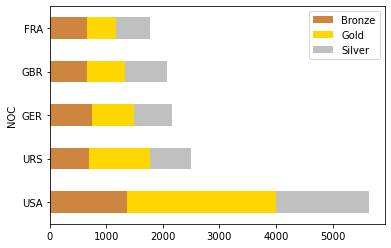

In [206]:
top5 = pw.head(5)[['Bronze','Gold','Silver']]
top5.plot.barh(stacked=True, color=['peru','gold','silver']);

Диаграмма демонстрирует доли медалей каждого качества в общей их сумме у ТОП 5 стран по общему количеству медалей. По диаграмме видно, что США лидирует более чем в 2 раза как по общему количеству медалей, так и по кол-ву золотых. Также у США доля золотых медалей более 50% (от суммы всех медалей США). На 2-5 местах расположены сборные СССР, Германии, Великобритании и Франции (с небольшим разрывов как видно из диаграммы). 

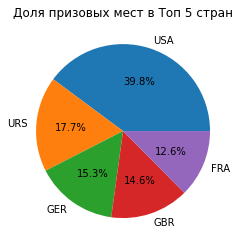

In [207]:
plot1 = pw.Prizewinner.head(5).plot(kind="pie",autopct='%1.1f%%', title = 'Доля призовых мест в Топ 5 стран')
plot1.set_ylabel('');

На диаграмме выше отображены доли медалей стран в ТОП 5 стран по общему количеству медалаей. На графике еще более наглядно показано доминирование сборной США. Доля их медалей в ТОП 5 - почти 40%, при том, что у остальных 4 стран в сумме доля - оставшиеся 60%.

In [208]:
#Найдем долю их медалей от общего количества:
pw['Total medal share']=(0)
for i in range(0,6):
    pw.iloc[i,4] = round(pw.iloc[i,0]/pw.Prizewinner.sum()*100,1)
pws = pw['Total medal share'].head(5)
pws

NOC
USA    14.2
URS     6.3
GER     5.4
GBR     5.2
FRA     4.5
Name: Total medal share, dtype: float64

Из таблицы выше видно, что более 14% всех медалей у сборной США, от 4,5 % до 6,3 % от общего числа медалей у остальных стран ТОП 5.

In [209]:
#Рейтинг стран по общему количеству призовых мест (с учетом распада союза и соединения ГДР и ФРГ)
dfpw = (data1.groupby('NOC').agg({'Prizewinner':'sum','Bronze':'sum','Gold':'sum','Silver':'sum'}).astype(int)
        .sort_values(by = 'Prizewinner', ascending = False))
d1 = pd.DataFrame()
d1['RUS/URS'] = dfpw.loc['RUS'] + dfpw.loc['URS']
d1['GER/GDR/FRG'] = dfpw.loc['GER'] + dfpw.loc['GDR'] + dfpw.loc['FRG']
dfpw = dfpw.append(d1.T).sort_values(by=['Prizewinner'], ascending=False)
dfpw2 = dfpw.drop(['RUS','URS','GER','FRG','GDR'])
dfpw2.head(10)

,Prizewinner,Bronze,Gold,Silver
USA,5637,1358,2638,1641
GER/GDR/FRG,3756,1260,1301,1195
RUS/URS,3668,1097,1472,1099
GBR,2068,651,678,739
FRA,1777,666,501,610
ITA,1637,531,575,531
SWE,1536,535,479,522
CAN,1352,451,463,438
AUS,1320,517,348,455
HUN,1135,371,432,332


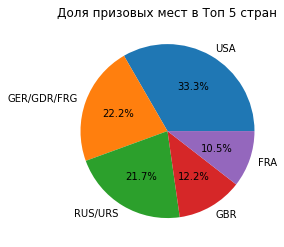

In [210]:
plot2 = dfpw2.Prizewinner.head(5).plot(kind="pie",autopct='%1.1f%%', title = 'Доля призовых мест в Топ 5 стран')
plot2.set_ylabel('');

При объединении медалей СССР и России, а также ГДР, ФРГ и Германии, ситуация неменого меняется. США остается на верхней строчке, однако не со столь большим преимуществом. Суммарно сборные ГДР, ФРГ и Германии на 0,5% обошли СССР/Россию по доле медалей в ТОП5 стран-призер Олимпиад.

In [211]:
# Лучшие спортсмены в личном зачете (по общему количеству медалей всех достоинств)
data3 = data1[['Name', 'Sex', 'Team', 'NOC','Sport', 'Bronze','Gold', 'Silver','Prizewinner']]
bs = data3.groupby(['Name','Sex','Team','NOC','Sport'])
bs10 = bs.sum().sort_values(by = 'Prizewinner', ascending = False).head(10)

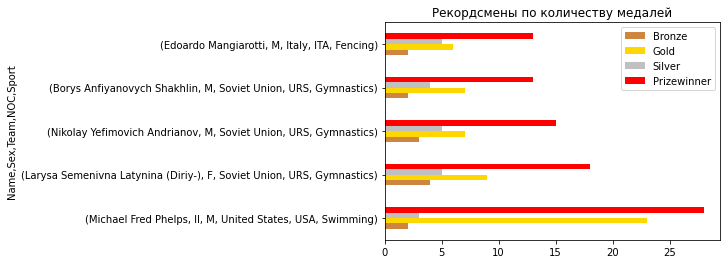

In [212]:
bs10.head(5).plot.barh(color=['peru','gold','silver','r'],title='Рекордсмены по количеству медалей');

На диаграмме выше представлены рекордсмены по количеству медалей на всех Олимпийских играх. Абсолютный рекордсмен - Майкл Фелпс из Сша. Он лидирует как по общему числу призовых мест, так и по количеству первых мест с большим отрывом. Нельзя не отметить Советских гимнастов, которые расположились на 2-4 местах.

In [213]:
# Лучшие спортсмены в личном зачете среди СССР и России (по общему количеству медалей всех достоинств)
data4 =  (data1[(data1.NOC=='URS') | (data1.NOC=='RUS')] 
          [['Name', 'Sex', 'Team', 'NOC','Sport', 'Bronze','Gold', 'Silver','Prizewinner']])
bsr = data4.groupby(['Name','Sex','Team','NOC','Sport'])
bsr10 = bsr.sum().sort_values(by = 'Prizewinner', ascending = False).head(10)

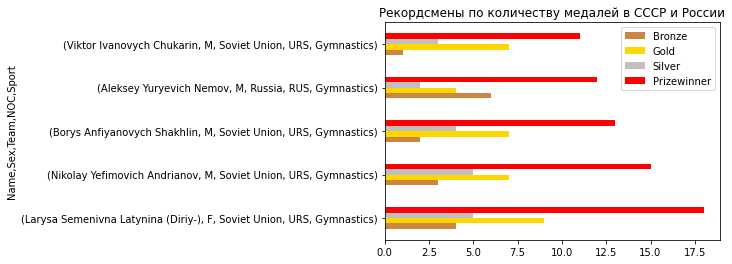

In [214]:
bsr10.head(5).plot.barh(color=['peru','gold','silver','r'], title='Рекордсмены по количеству медалей в СССР и России');

Лидеры среди российских и советских медалистов за всем время. Все спортсмены являются гимнастами. 

In [215]:
# Лучшие спортсмены в личном зачете среди граждан России (по общему количеству медалей всех достоинств)
data5 =  data1[(data1.NOC=='RUS')] [['Name', 'Sex', 'Team', 'NOC','Sport', 'Bronze','Gold', 'Silver','Prizewinner']]
bsr2 = data5.groupby(['Name','Sex','Team','NOC','Sport'])
bsr2.sum().sort_values(by = 'Prizewinner', ascending = False).head(10)

,,,,,Bronze,Gold,Silver,Prizewinner
Name,Sex,Team,NOC,Sport,,,,
Aleksey Yuryevich Nemov,M,Russia,RUS,Gymnastics,6,4,2,12
Svetlana Vasilyevna Khorkina,F,Russia,RUS,Gymnastics,1,2,4,7
Aliya Farkhatovna Mustafina,F,Russia,RUS,Gymnastics,3,2,2,7
Dmitry Ivanovich Sautin,M,Russia,RUS,Diving,3,2,2,7
Yuliya Anatolyevna Chepalova,F,Russia,RUS,Cross Country Skiing,1,3,2,6
Larisa Yevgenyevna Lazutina (Ptitsyna-),F,Russia,RUS,Cross Country Skiing,1,4,1,6
Svetlana Alekseyevna Romashina,F,Russia,RUS,Synchronized Swimming,0,5,0,5
Tatyana Romanovna Lebedeva,F,Russia,RUS,Athletics,1,1,3,5
Albina Khamitovna Akhatova,F,Russia,RUS,Biathlon,3,1,1,5


В таблице выше лидеры среди только российских спортсменов.

In [216]:
# Вычислим самых высоких спортсменов 
dfHeight = pd.DataFrame(data1.groupby(['Sport'])['Height'].mean().round(1).sort_values(ascending = False)).reset_index()
dfHeight.head(10)

,Sport,Height
0,Basketball,190.9
1,Volleyball,187.0
2,Beach Volleyball,186.1
3,Water Polo,184.8
4,Rowing,184.2
5,Handball,183.4
6,Baseball,182.6
7,Tug-Of-War,182.5
8,Bobsleigh,181.4
9,Motorboating,181.0


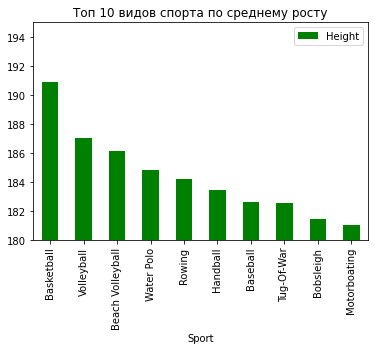

In [244]:
ploth = dfHeight.head(10).plot.bar(ylim=[180,195], y='Height', x='Sport', color='g', title='Топ 10 видов спорта по среднему росту');

На этой диаграмме представлены 10 видов спорта, спортсмены которых имеют наибольший средний рост. По диаграмме видно, что три вида спорта довольно значительно превосходят по среднему росту - это баскетбол (190.9 см) , волейбол (187.0 см пляжный волейбол (186.1 см). 

In [218]:
# Самые высокие среди мужчин 
dfHeightm = data1[data1['Sex'] == 'M'].groupby(['Sport'])['Height'].mean().round(1).sort_values(ascending = False)
dfHeightm.head(10)

Sport
Basketball          194.9
Volleyball          193.3
Beach Volleyball    193.3
Handball            188.8
Rowing              186.9
Water Polo          186.8
Tennis              184.8
Swimming            184.3
Rugby Sevens        182.8
Baseball            182.6
Name: Height, dtype: float64

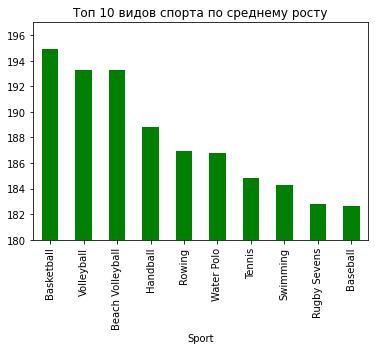

In [219]:
dfHeightm.head(10).plot.bar(ylim=[180,197], y='Height', x='Sport', color='g', title='Топ 10 видов спорта по среднему росту');

Ситуация с мужскими видами спорта аналогична. Баскетбол, Волейбол и пляжный волейбол значительно выделяются.

In [220]:
# Самые высокие среди женщин
dfHeightw = data1[data1['Sex'] == 'F'].groupby(['Sport'])['Height'].mean().round(1).sort_values(ascending = False)
dfHeightw.head(10)

Sport
Basketball          182.5
Volleyball          179.5
Beach Volleyball    178.9
Rowing              176.8
Water Polo          175.6
Handball            174.8
Bobsleigh           173.2
Tennis              172.3
Swimming            171.5
Taekwondo           170.8
Name: Height, dtype: float64

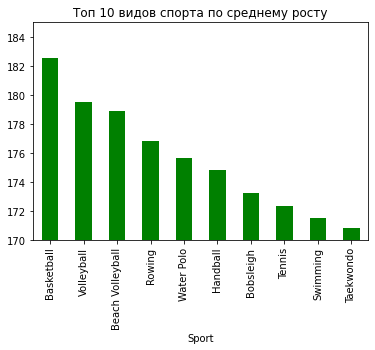

In [221]:
dfHeightw.head(10).plot.bar(ylim=[170,185], y='Height', x='Sport', color='g', title='Топ 10 видов спорта по среднему росту');

И вновь аналогична ситуация со средним ростом в женских видах спорта.

In [222]:
# Вычислим самых высоких спортсменов 
dfWeight = pd.DataFrame(data1.groupby(['Sport'])['Weight'].mean().round(1).sort_values(ascending = False)).reset_index()
dfWeight.head(10)

,Sport,Weight
0,Tug-Of-War,95.6
1,Bobsleigh,89.3
2,Basketball,85.8
3,Baseball,85.7
4,Water Polo,84.6
5,Handball,81.5
6,Ice Hockey,80.8
7,Rowing,80.0
8,Beach Volleyball,79.1
9,Rugby Sevens,78.9


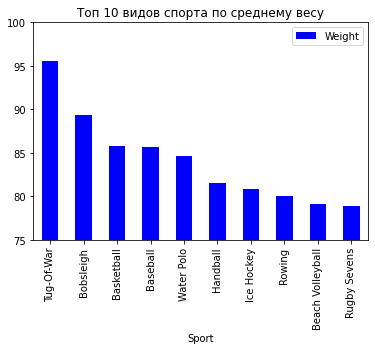

In [223]:
dfWeight.head(10).plot.bar(ylim=[75,100], y='Weight', x='Sport', color='b', title='Топ 10 видов спорта по среднему весу');

На этой диаграмме представлены топ 10 видов спорта по среднему весу. Лидирующую позицию занимает перетягивание каната, спортсмены из этого вида спорта на более чем 5 кг в среднем тяжелее второго места (бобслея), приэтом по среднему росту перетягивание каната было лишь 7 в топ 10.

In [224]:
# Самые высокие среди мужчин 
dfWeightm = data1[data1['Sex'] == 'M'].groupby(['Sport'])['Weight'].mean().round(1).sort_values(ascending = False)
dfWeightm.head(10)

Sport
Tug-Of-War          95.6
Basketball          91.7
Rugby Sevens        91.0
Bobsleigh           90.4
Beach Volleyball    89.5
Handball            89.4
Water Polo          87.7
Volleyball          86.9
Baseball            85.7
Ice Hockey          83.8
Name: Weight, dtype: float64

В мужских видах спорта также лидирует перетягивание каната.

In [225]:
# Самые высокие среди женщин
dfWeightw = data1[data1['Sex'] == 'F'].groupby(['Sport'])['Weight'].mean().round(1).sort_values(ascending = False)
dfWeightw.head(10)

Sport
Basketball          73.7
Bobsleigh           72.8
Water Polo          70.2
Rowing              70.1
Volleyball          69.3
Handball            68.9
Beach Volleyball    68.4
Weightlifting       67.7
Softball            67.5
Judo                67.1
Name: Weight, dtype: float64

При этом, тк перетягивание каната является мужским видом спорта, у женщин ситуация с видами спорта, где спортсмены имеют наибольший вес, несколько отличается. Лидирует - баскетбол.